In [1]:
#Data Visualization Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", color_codes=True)
import numpy as np
import plotly.express as px
from collections import Counter

In [2]:
#ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_percentage_error

In [51]:
dfs = pd.read_csv("./fitness_tracker_dataset.csv")
df = dfs.sample(frac=0.1, random_state=42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 987231 to 573083
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             100000 non-null  int64  
 1   date                100000 non-null  object 
 2   steps               100000 non-null  int64  
 3   calories_burned     100000 non-null  float64
 4   distance_km         100000 non-null  float64
 5   active_minutes      100000 non-null  int64  
 6   sleep_hours         100000 non-null  float64
 7   heart_rate_avg      100000 non-null  int64  
 8   workout_type        85682 non-null   object 
 9   weather_conditions  100000 non-null  object 
 10  location            100000 non-null  object 
 11  mood                100000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 9.9+ MB


In [52]:
df.columns

Index(['user_id', 'date', 'steps', 'calories_burned', 'distance_km',
       'active_minutes', 'sleep_hours', 'heart_rate_avg', 'workout_type',
       'weather_conditions', 'location', 'mood'],
      dtype='object')

In [53]:
df.head()

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
987231,473,2025-09-14,1653,2829.19,14.76,841,4.2,91,NaN,Snow,Park,Neutral
79954,32,2023-03-21,5769,3388.02,16.43,243,4.0,121,Swimming,Snow,Other,Tired
567130,786,2024-07-21,1917,3771.03,2.19,1266,5.0,60,Walking,Clear,Office,Happy
500891,387,2024-05-15,12288,3452.90,1.56,405,9.8,86,NaN,Rain,Office,Tired
55399,269,2023-02-25,15026,3251.65,0.72,104,5.8,110,Running,Clear,Other,Stressed


In [54]:
df.describe()

,user_id,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,497.954960,14978.592400,2751.222352,10.021438,720.230980,5.998982,119.64447
std,288.125057,8672.424378,722.093405,5.776013,417.086163,3.461210,34.66726
min,1.000000,0.000000,1500.020000,0.000000,0.000000,0.000000,60.00000
25%,249.000000,7432.000000,2127.092500,5.010000,357.000000,3.000000,90.00000
50%,497.000000,14978.000000,2749.875000,10.030000,721.000000,6.000000,120.00000
75%,747.000000,22515.000000,3377.920000,15.030000,1082.000000,9.000000,150.00000
max,999.000000,29999.000000,3999.940000,20.000000,1439.000000,12.000000,179.00000


In [55]:
df['date'] = pd.to_datetime(df['date'])

df = df[df['date'] <= '2024-10-01']

df.head()

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
79954,32,2023-03-21,5769,3388.02,16.43,243,4.0,121,Swimming,Snow,Other,Tired
567130,786,2024-07-21,1917,3771.03,2.19,1266,5.0,60,Walking,Clear,Office,Happy
500891,387,2024-05-15,12288,3452.90,1.56,405,9.8,86,NaN,Rain,Office,Tired
55399,269,2023-02-25,15026,3251.65,0.72,104,5.8,110,Running,Clear,Other,Stressed
135049,258,2023-05-16,686,3431.71,9.11,1129,11.5,75,Walking,Snow,Other,Neutral


In [56]:
print(df.isnull().sum())


user_id                  0
date                     0
steps                    0
calories_burned          0
distance_km              0
active_minutes           0
sleep_hours              0
heart_rate_avg           0
workout_type          9145
weather_conditions       0
location                 0
mood                     0
dtype: int64


In [57]:
# tirar as linhas do workout_type ja que é o unico que tem valores nulos.
df = df.dropna()

In [58]:
df.duplicated().sum()

0

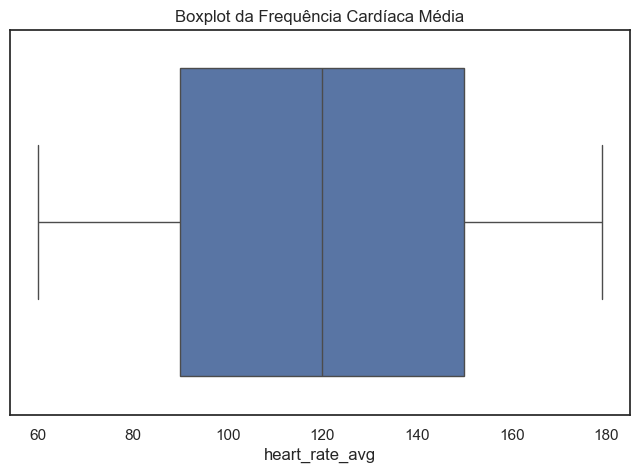

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['heart_rate_avg'], color='#4c72b0')
plt.title('Boxplot da Frequência Cardíaca Média')
plt.show()


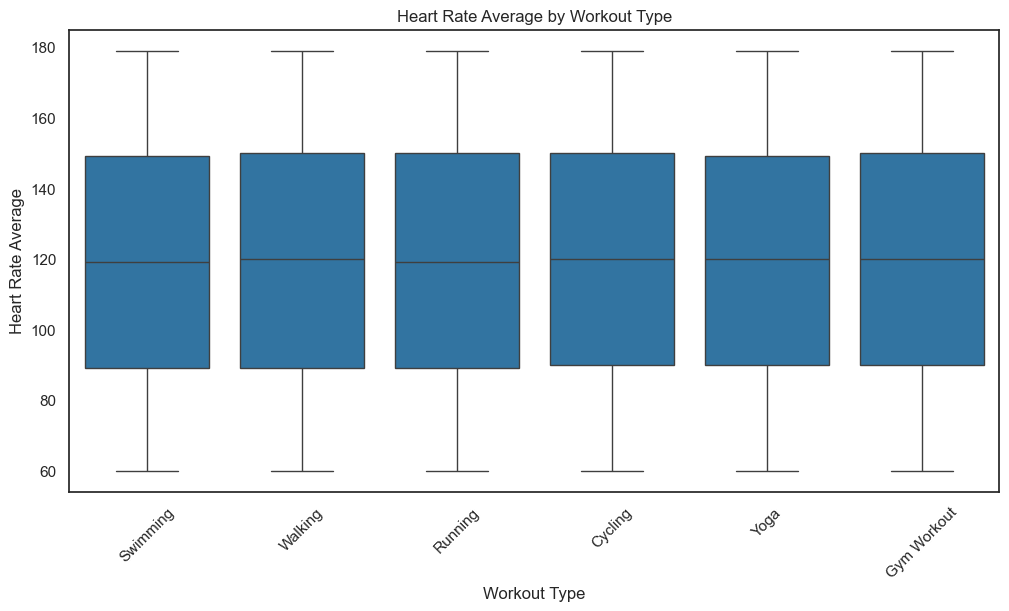

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='workout_type', y='heart_rate_avg', color='#1f77b4')
plt.title('Heart Rate Average by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Heart Rate Average')
plt.xticks(rotation=45)
plt.show()


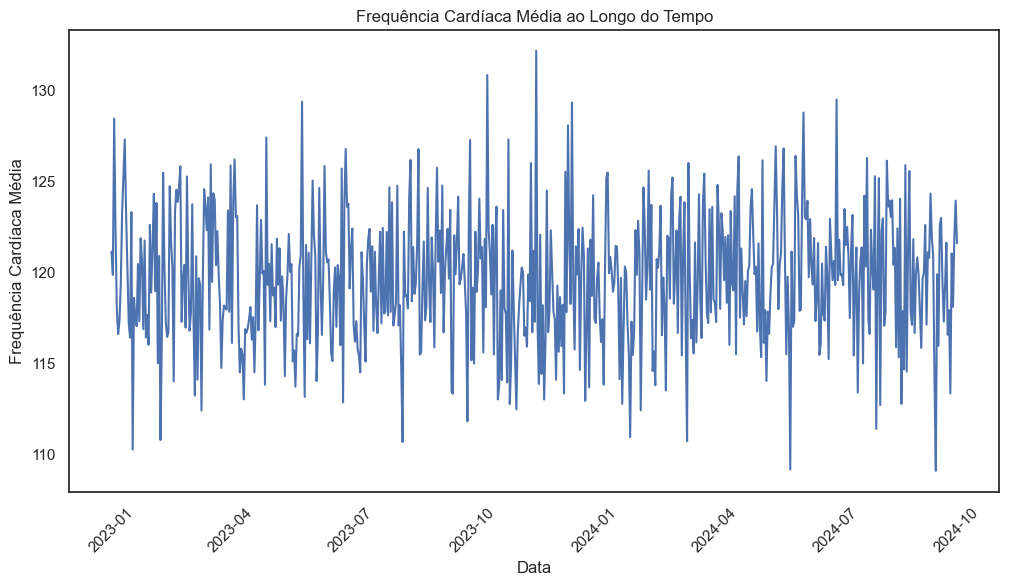

In [61]:
df['date'] = pd.to_datetime(df['date'])
daily_heart_rate = df.groupby('date')['heart_rate_avg'].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_heart_rate)
plt.title('Frequência Cardíaca Média ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Frequência Cardíaca Média')
plt.xticks(rotation=45)
plt.show()


In [62]:
df = pd.get_dummies(df, columns=['workout_type', 'weather_conditions', 'location', 'mood'], drop_first=True)


In [63]:
df.head()

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type_Gym Workout,workout_type_Running,...,weather_conditions_Fog,weather_conditions_Rain,weather_conditions_Snow,location_Home,location_Office,location_Other,location_Park,mood_Neutral,mood_Stressed,mood_Tired
79954,32,2023-03-21,5769,3388.02,16.43,243,4.0,121,False,False,...,False,False,True,False,False,True,False,False,False,True
567130,786,2024-07-21,1917,3771.03,2.19,1266,5.0,60,False,False,...,False,False,False,False,True,False,False,False,False,False
55399,269,2023-02-25,15026,3251.65,0.72,104,5.8,110,False,True,...,False,False,False,False,False,True,False,False,True,False
135049,258,2023-05-16,686,3431.71,9.11,1129,11.5,75,False,False,...,False,False,True,False,False,True,False,True,False,False
51333,106,2023-02-21,26695,2303.66,8.50,1182,10.6,143,False,False,...,False,False,False,False,False,True,False,False,False,False


In [64]:
X = df.drop(['heart_rate_avg', 'user_id', 'date'], axis=1)
y = df['heart_rate_avg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

k_values = range(1, 12)
cv_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    cv_scores.append(rmse_scores.mean())

for k, rmse in zip(k_values, cv_scores):
    print(f'RMSE KNN (k={k}) com validação cruzada: {rmse}')


RMSE KNN (k=1) com validação cruzada: 49.133082854464725
RMSE KNN (k=2) com validação cruzada: 42.54057008874654
RMSE KNN (k=3) com validação cruzada: 40.0937704865811
RMSE KNN (k=4) com validação cruzada: 38.856287557945016
RMSE KNN (k=5) com validação cruzada: 38.020004682060275
RMSE KNN (k=6) com validação cruzada: 37.46198681978278
RMSE KNN (k=7) com validação cruzada: 37.07982738229139
RMSE KNN (k=8) com validação cruzada: 36.80877844887412
RMSE KNN (k=9) com validação cruzada: 36.570744709853734
RMSE KNN (k=10) com validação cruzada: 36.411039554992875
RMSE KNN (k=11) com validação cruzada: 36.23476399377613


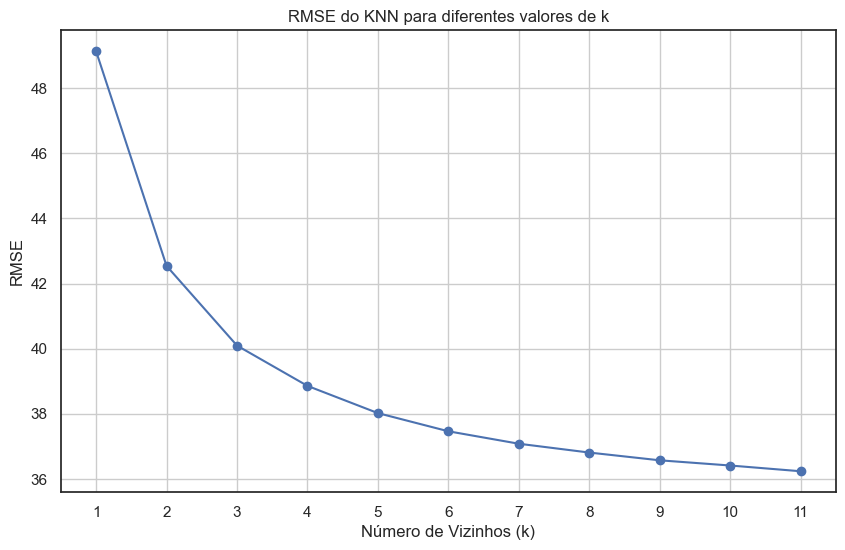

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('RMSE do KNN para diferentes valores de k')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('RMSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

best_k = 11
knn_model = KNeighborsRegressor(n_neighbors=best_k)

knn_model.fit(X_train_scaled, y_train)

y_pred_best = knn_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')


MAE: 30.98503776393406
MSE: 1313.981346069995
RMSE: 36.24888061816523
MAPE: 29.879407555332023
